I wrote SGD in the form of a module, just to be able to add more algorithms and test it easiy.

This is how it works

In [1]:
import numpy as np


import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

In [2]:
import SGD

In [3]:
#the squared error and its derivative
def Q_i(signal, target):
    return (signal-target)*(signal-target)


def dQds_i(signal, target):
    return 2*(signal-target)


#the model and its derivative wrt w
def f(self,x):
    self.signal[0]=x[0]*self.w[0]+ self.w[1]



def dfdw_i(self, i, x):
    if i==0:
        self.dsdw[0]=x[0]
    if i==1:
        self.dsdw[0]=1
        
        
#declare the instances
model=SGD.modelFunc(f,dfdw_i,[1,1],[1,0.2])
Q=SGD.lossFunc(Q_i,dQds_i,model)

In [4]:
data_in=[]
data_out=[]
xmin=-5
xmax=2
for i in range(5000):
    x=np.random.rand()*(xmax-xmin)+xmin
    
    data_in.append( [x])
    data_out.append( [2*x+3])

# strategy=SGD.VanillaSGD(Q ,data_in,data_out,alpha=1e-2)
# strategy=SGD.RMSpropSGD(Q ,data_in,data_out,gamma=1-1e-2,epsilon=1e-5,alpha=1e-2)
strategy=SGD.AdaDeltaSGD(Q ,data_in,data_out,gamma=0.99,epsilon=1e-5,alpha=1)
# strategy=SGD.AdamSGD(Q ,data_in,data_out,beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)
# strategy=SGD.AdaMaxSGD(Q ,data_in,data_out,beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)
# strategy=SGD.NAdamSGD(Q ,data_in,data_out,beta_m=0.9,beta_v=0.999,epsilon=1e-8,alpha=1e-2)

In [5]:
sgd=SGD.StochasticGradientDescent(strategy)
w=sgd.run(abs_tol=1e-5, rel_tol=1e-5, step_break=250,max_step=5000)

<IPython.core.display.Javascript object>


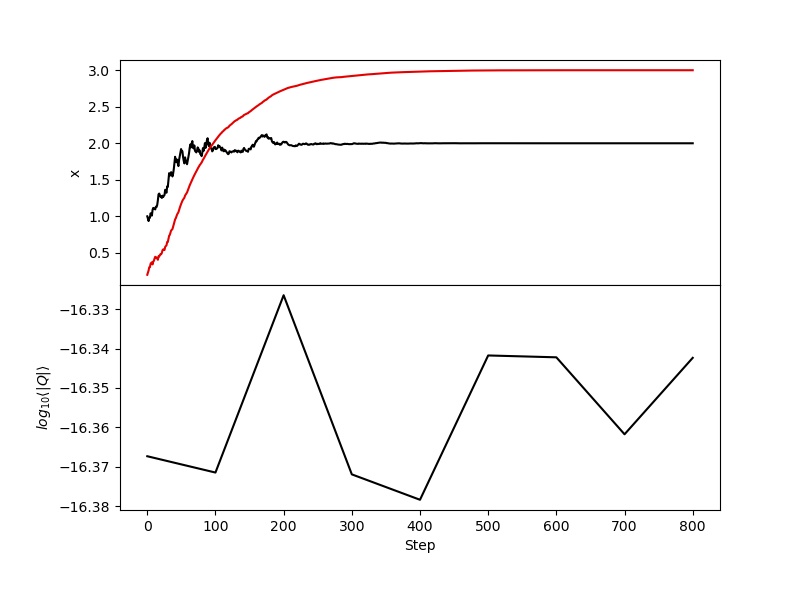

In [6]:
fig=plt.figure(figsize=(8,6))
fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.1,hspace=0)
#=============================================================================#


sub = fig.add_subplot(211)
sub.get_xaxis().set_visible(False)

sub.plot(np.array(strategy.steps)[:,0],c='xkcd:black')
sub.plot(np.array(strategy.steps)[:,1],c='xkcd:red')

sub.set_ylabel('x')
# sub.set_xscale('log')
sub.set_yscale('linear')


sub = fig.add_subplot(212)
meanQ=[]
steps=[]
_s=0
skip=100
for w in strategy.steps[::skip]:
    f.w=w
    mQ=0
    _r=range(len(data_in))
    mC=50
    for _ in range(mC): 
        i=np.random.choice(_r)
        model(data_in[i])
        mQ+=np.abs( Q(model.signal,data_out[i]) )
        
    if mQ==0:
        mQ=1e-50
    meanQ.append(np.log10(mQ/mC))
    steps.append(_s)
    _s+=skip
    
sub.plot(steps,meanQ,c='xkcd:black')

sub.set_ylabel(r'$log_{10} \langle |Q| \rangle $')

# sub.set_xscale('log')
sub.set_yscale('linear')

sub.set_xlabel('Step')

plt.show()